# Project 1: Seattle AirBnB
## Main Questions
### Q1 - On average, what are the most expensives properties type in Seattle?
### Q2 - How the price varies by months in Seattle?
### Q3 - What is the average price splited by properties type and neighbourhood in Seattle?


In [535]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [536]:
df_cld = pd.read_csv('calendar.csv')
df_lst = pd.read_csv('listings.csv')

In [537]:
df_cld.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [538]:
df_lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [539]:
#Treatment of data from 'calendar.csv' dataset
df_cld['price'] = df_cld['price'].str.replace('[\$\,]', '').astype('float64')  
df_cld['date'] = pd.to_datetime(df_cld['date'])                                
df_cld['month'] = df_cld.date.dt.month

#Treatment of data from 'listing.csv' dataset
df_lst.rename(columns = {'id' : 'listing_id'}, inplace = True)

In [540]:
# Getting the number of listing by property type
sr_prop_type = df_lst['property_type'].value_counts()
sr_prop_type

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [541]:
#Creating the DataFrame which will be analised later
df_1_analysis = pd.merge(df_cld, df_lst.loc[:, ['listing_id', 'property_type', 'room_type', 'bedrooms', 'beds']], on = 'listing_id', how = 'left')

#Treatment of data from DataFrame created in previous step
df_1_analysis['bedrooms'] = df_1_analysis['bedrooms'].replace(0, df_1_analysis['bedrooms'].mean())
df_1_analysis['beds'] = df_1_analysis['beds'].replace(0, df_1_analysis['beds'].mean())
df_1_analysis['bedrooms_price'] = df_1_analysis['price'] / df_1_analysis['bedrooms']
df_1_analysis['beds_price'] = df_1_analysis['price'] / df_1_analysis['beds']
df_1_analysis.head()

,listing_id,date,available,price,month,property_type,room_type,bedrooms,beds,bedrooms_price,beds_price
0,241032,2016-01-04,t,85.0,1,Apartment,Entire home/apt,1.0,1.0,85.0,85.0
1,241032,2016-01-05,t,85.0,1,Apartment,Entire home/apt,1.0,1.0,85.0,85.0
2,241032,2016-01-06,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN
3,241032,2016-01-07,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN
4,241032,2016-01-08,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN


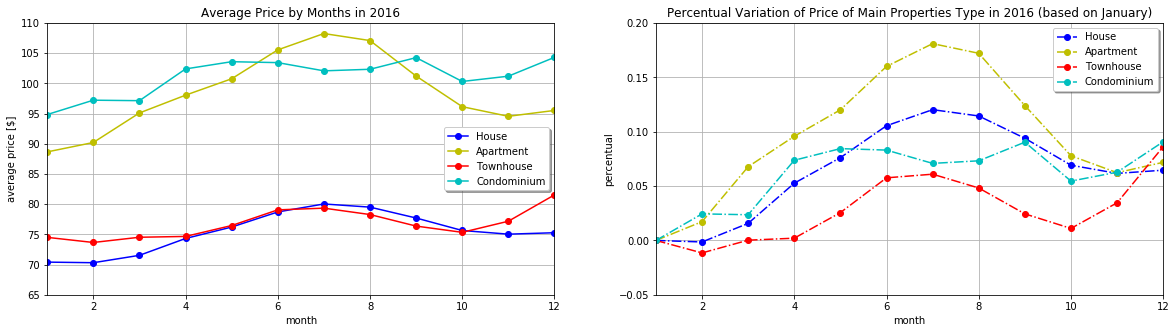

In [553]:
#First Plotting Section

#Groupping the df_1_analysis in order to get the best plot
#df_1_analysis_grp = df_1_analysis.groupby(['property_type', 'month'])['bedrooms_price'].mean()
df_1_analysis_grp = df_1_analysis.groupby(['property_type', 'month'])['beds_price'].mean() 

#Creating variable that will support the plotting
dic_fmt = {1 : 'bo-', 2 : 'yo-', 3 : 'ro-', 4 : 'co-', 5 : 'bo-.', 6 : 'yo-.', 7 : 'ro-.', 8 : 'co-.'} #linestyle
fig, graph = plt.subplots(1, 2)
count = 1

#Input of data
for prop_type in list(df_prop_type.index[:4]):
    df_plot = pd.DataFrame(df_1_analysis_grp[prop_type]).reset_index()
    #df_plot['prec_raise'] = (df_plot['bedrooms_price'] - df_plot.iloc[0,1]) / df_plot['bedrooms_price']
    df_plot['prec_raise'] = (df_plot['beds_price'] - df_plot.iloc[0,1]) / df_plot['beds_price']
    
    x= list(df_plot['month'])
    #y1= list(df_plot['bedrooms_price'])
    y1= list(df_plot['beds_price'])
    y2= list(df_plot['prec_raise'])

    graph[0].plot(x,y1, dic_fmt[count], label = prop_type)
    graph[1].plot(x,y2, dic_fmt[count+4], label = prop_type)
    
    count += 1

#Setting of charts
fig.set_size_inches(20, 5)
graph[0].legend(shadow = True)
graph[0].set(xlabel = 'month', ylabel = 'average price [$]', 
             title = 'Average Price by Months in 2016',
             xlim = [1, 12], ylim=[65, 110]) #ylim=[65, 115] beds            
graph[1].legend(shadow = True) 
graph[1].set(xlabel = 'month', ylabel = 'percentual', 
             title = 'Percentual Variation of Price of Main Properties Type in 2016 (based on January)',
             xlim = [1, 12], ylim=[-0.05, 0.2])
graph[0].grid()
graph[1].grid()

plt.show()


# *****CONCLUSION*****

##### ****First**** - Both charts show us that the prices reach the maximum in middle of summer for the majority of properties type. It is a strong signal that the biggest people´s movement in this city occurs in summer, probably boosted by tourism movement because Seattle is a coastal city. But this role is not followed by condominiuns that tend to have a little variation in summer.

##### ****Second**** - The left chart indicates that the most expensive properties type are apartment and condominium whereas the cheapest are townhouse and house. Another important information comes from the right chart: the percentual raising of price (based in January 2016) has been between 5% and 10 % for all properties type, but apartaments and houses reasing raises more than 15% and 10% in high summer (July), respectively. It is can be a ciclic process, but to confirm that we need more information.

In [549]:
#Creating the second dataframe that will be analyzed
lft = df_1_analysis
rgt = df_lst.loc[:, ['listing_id','neighbourhood_group_cleansed']] 
df_2_analysis = pd.merge(lft, rgt, on = 'listing_id', how = 'left')
df_2_analysis.head()

,listing_id,date,available,price,month,property_type,room_type,bedrooms,beds,bedrooms_price,beds_price,neighbourhood_group_cleansed
0,241032,2016-01-04,t,85.0,1,Apartment,Entire home/apt,1.0,1.0,85.0,85.0,Queen Anne
1,241032,2016-01-05,t,85.0,1,Apartment,Entire home/apt,1.0,1.0,85.0,85.0,Queen Anne
2,241032,2016-01-06,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN,Queen Anne
3,241032,2016-01-07,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN,Queen Anne
4,241032,2016-01-08,f,NaN,1,Apartment,Entire home/apt,1.0,1.0,NaN,NaN,Queen Anne


In [550]:
df_2_analysis.groupby('neighbourhood_group_cleansed')['beds_price'].mean().sort_values(ascending = False)

neighbourhood_group_cleansed
Downtown               115.242298
Interbay               109.819093
Cascade                105.166880
Queen Anne             104.421035
Magnolia                99.699445
Capitol Hill            95.858009
West Seattle            85.731365
Central Area            81.968559
Other neighborhoods     77.248743
Ballard                 74.577186
Beacon Hill             68.876384
Lake City               68.005195
Delridge                67.887545
Rainier Valley          66.508048
University District     65.502825
Northgate               62.336721
Seward Park             61.318040
Name: beds_price, dtype: float64

In [551]:
#sr_ngbhood_grp = df_2_analysis.groupby(['property_type', 'neighbourhood_group_cleansed'])['beds_price'].mean()
sr_ngbhood_grp = sr_ngbhood_grp[list(df_prop_type.index[:4])] 
df_ngbhood_grp = pd.DataFrame(sr_ngbhood_grp)['beds_price'] 
df_ngbhood_grp = df_ngbhood_grp.unstack(0).sort_index()


df_ngbhood_grp.fillna(0, inplace = True)
df_ngbhood_grp['total'] = df_ngbhood_grp['Condominium'] + df_ngbhood_grp['Apartment'] + df_ngbhood_grp['Townhouse'] + df_ngbhood_grp['House']
df_ngbhood_grp.sort_values(by = ['total'], ascending = False, inplace= True)
df_ngbhood_grp

property_type,Apartment,Condominium,House,Townhouse,total
neighbourhood_group_cleansed,,,,,
Queen Anne,104.626461,107.375000,103.121020,127.825987,442.948468
Magnolia,143.048839,140.000000,88.931442,67.768243,439.748523
Cascade,110.691845,113.086304,89.305355,122.000000,435.083504
Interbay,138.813535,165.168539,80.024167,0.000000,384.006241
West Seattle,85.779672,139.303393,83.629785,66.320253,375.033103
Capitol Hill,102.643041,96.409247,79.420669,85.827870,364.300827
Downtown,116.279570,111.907811,127.670613,0.000000,355.857994
Central Area,86.520327,82.677170,81.371208,73.657953,324.226658
Ballard,83.186023,72.977433,72.092260,71.128654,299.384371


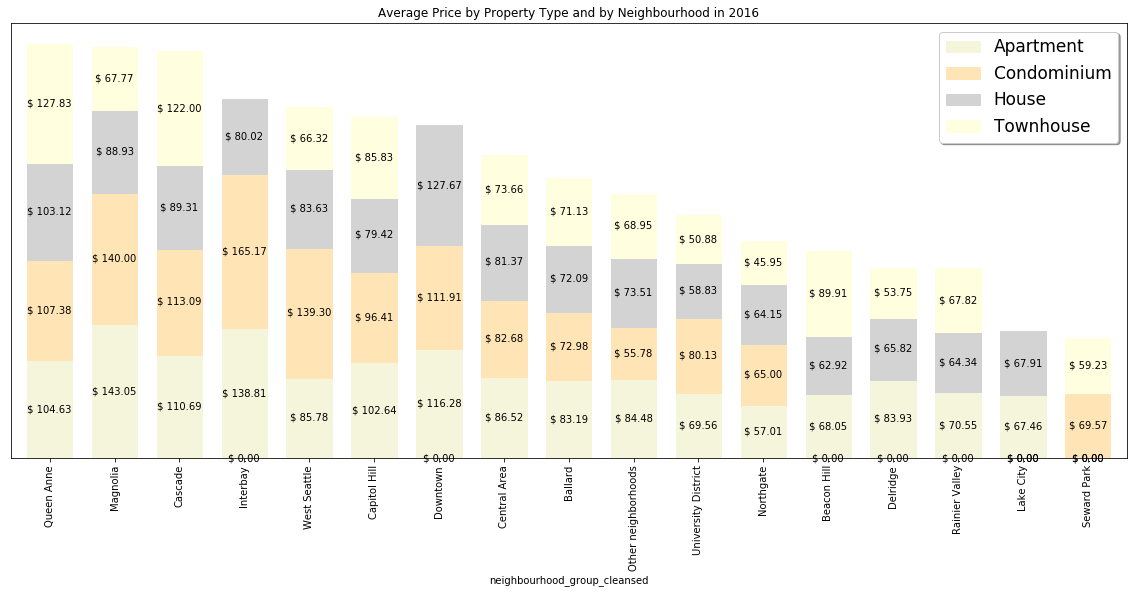

In [555]:
#First Plotting Section

chart3 = df_ngbhood_grp.loc[:, 'Apartment': 'Townhouse'].plot.bar(stacked=True, width = 0.7, title = 'Average Price by Property Type and by Neighbourhood in 2016')

#Support variables
count = 1
color = 'beige'

#Plotting
for p in chart3.patches:
    if count >= 17: color = 'moccasin'
    if count >= 34: color = 'lightgray'
    if count >= 51: color = 'lightyellow'
    p.set_color(color)
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    chart3.text(x+width/2, y+height/2, '$ {:.2f}'.format(height), horizontalalignment='center', verticalalignment='center')
    count += 1
    
#Setting of chart    
chart3.figure.set_size_inches(20, 8)
chart3.yaxis.set_visible(False)
chart3.legend(shadow = True, fontsize = 17)

# *****CONCLUSION*****
### With the table above, we can evaluate the price of each property type splited by neighbourhood and then take some informations: 
#### (1) - The neighbourhood influences the average price of each property tipy and vice versa. 
####       For example: for condominium, the most expensive costs 165.17 dollars (Interbay) whereas the cheapest costs 55.78 dollar (Other neighborhoods). In another hand, for Queen Anne neighborhood townhouses (127.83) are more expensive then apartaments (104.63).